# Introduction to Neural Networks

## Import packages

In [2]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
C:\Users\Hailey\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hailey\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hailey\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hailey\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

## Load the data

In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [33]:
X_train[0].shape

(28, 28)

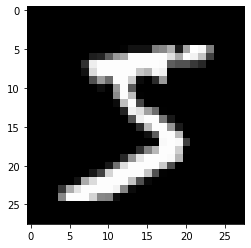

In [34]:
plt.imshow(X_train[0], cmap='gray')

In [35]:
y_train[0]

5

## Preprocessing the image data

In [36]:
image_height, image_width = 28, 28

In [37]:
X_train = X_train.reshape(60000, image_height*image_width)

In [38]:
X_test = X_test.reshape(10000, image_height*image_width)

In [39]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [40]:
# print(X_train[0]) #confirm 0 to 255
X_train.astype('float')
X_test.astype('float')

X_train = X_train/255.0
X_test = X_test/255.0
# print(X_train[0]) #confirm 0 to 1

In [41]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [43]:
y_train = to_categorical(y_train, 10)
print(y_train.shape)

y_test = to_categorical(y_test, 10)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [44]:
model = Sequential()

In [45]:
model.add(Dense(512, activation='relu', input_shape=(784,))) #input layer
model.add(Dense(512, activation='relu')) 
model.add(Dense(10, activation='softmax')) #output layer

## Compile the model

In [46]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [48]:
784 * 512 + 512 #pixels * nodes + bias = parameters for input layer
512*512+512
512*10+10

5130

## Train the model

In [49]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 380us/step - loss: 0.1838 - accuracy: 0.9442 - val_loss: 0.0999 - val_accuracy: 0.9681
Epoch 2/20
60000/60000 [==============================] - 24s 393us/step - loss: 0.0798 - accuracy: 0.9750 - val_loss: 0.0693 - val_accuracy: 0.9787
Epoch 3/20
60000/60000 [==============================] - 25s 421us/step - loss: 0.0554 - accuracy: 0.9826 - val_loss: 0.0763 - val_accuracy: 0.9785
Epoch 4/20
60000/60000 [==============================] - 25s 420us/step - loss: 0.0436 - accuracy: 0.9861 - val_loss: 0.0749 - val_accuracy: 0.9770
Epoch 5/20
60000/60000 [==============================] - 25s 424us/step - loss: 0.0344 - accuracy: 0.9888 - val_loss: 0.0836 - val_accuracy: 0.9784
Epoch 6/20
60000/60000 [==============================] - 25s 425us/step - loss: 0.0301 - accuracy: 0.9903 - val_loss: 0.0977 - val_accuracy: 0.9760
Epoch 7/20
60000/60000 [==============================]

## What is the accuracy of the model?

### Plot the accuracy of the training model

### Plot the accuracy of training and validation set

### Accuracy of training and validation with loss

## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

## Import the libraries

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Pre-processing

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
num_classes = 10
epochs = 3

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Use the model

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

In [ ]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Recall that when using neural networks we got good accuracy.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])

## Not related just testing out files

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()